In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score

In [4]:
df=pd.read_csv("weight_height_dataset (1).csv")

In [6]:
df

,Height(cm),Weight(kg),Class
0,171.408421,69.037935,Normal
1,153.935688,47.797508,Underweight
2,176.573961,78.871438,Overweight
3,170.663093,70.263714,Normal
4,164.009912,68.730922,Normal
...,...,...,...
145,181.933161,85.660306,Overweight
146,166.007758,73.997699,Normal
147,158.383396,55.464065,Underweight
148,174.596901,86.130276,Overweight


Normal         50
Underweight    50
Overweight     50
Name: Class, dtype: int64


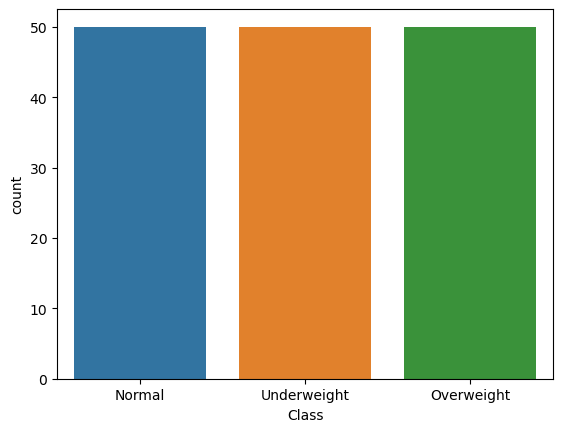

In [14]:
print(df['Class'].value_counts())
sns.countplot(x='Class',data=df)
plt.show()

In [16]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [20]:
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (112, 2)
x_test: (38, 2)
y_train: (112,)
y_test: (38,)


In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_trainn=sc.fit_transform(x_train)
x_testt=sc.transform(x_test)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_trainn,y_train)

KNeighborsClassifier()

In [38]:
print(classifier.predict(sc.transform([[150,46]])))

['Underweight']


In [40]:
y_pred=classifier.predict(x_testt)
y_pred

array(['Normal', 'Underweight', 'Normal', 'Normal', 'Normal',
       'Overweight', 'Overweight', 'Overweight', 'Normal', 'Underweight',
       'Normal', 'Overweight', 'Underweight', 'Overweight', 'Underweight',
       'Underweight', 'Normal', 'Normal', 'Normal', 'Overweight',
       'Underweight', 'Normal', 'Normal', 'Underweight', 'Overweight',
       'Overweight', 'Overweight', 'Underweight', 'Normal', 'Normal',
       'Normal', 'Normal', 'Overweight', 'Normal', 'Normal', 'Normal',
       'Overweight', 'Underweight'], dtype=object)

In [44]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_pred)
cf

array([[16,  1,  0],
       [ 2, 10,  0],
       [ 0,  0,  9]], dtype=int64)

In [46]:
labels=classifier.classes_
labels

array(['Normal', 'Overweight', 'Underweight'], dtype=object)

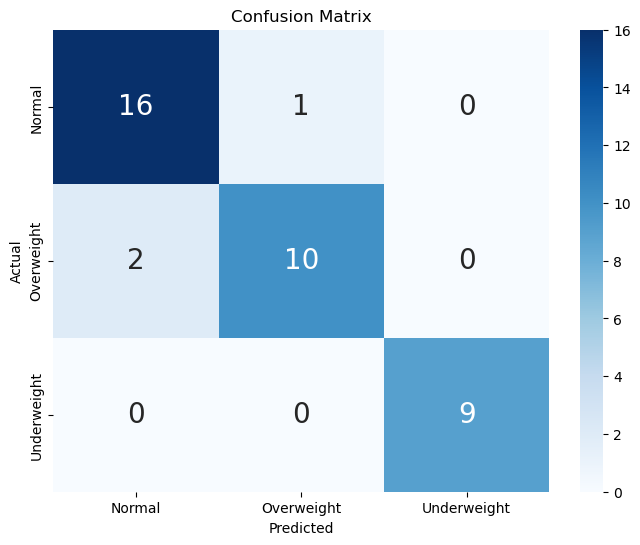

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(8,6))
sns.heatmap(cf,annot=True,annot_kws={"size":20},fmt='d',cmap="Blues",xticklabels=labels,yticklabels=labels,ax=ax)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show(block=False)

